In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
data = mnist.load_data()

In [ ]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils as np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

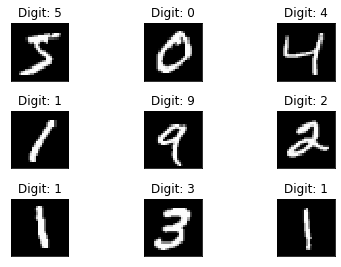

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
model = Sequential() 

#1st hidden layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
#model.add(Dropout(0.2))

#2nd hidden layer
model.add(Dense(784))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

#3rd hidden layer
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               402192    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [ ]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 3s - loss: 1.0726 - accuracy: 0.7674 - val_loss: 0.4630 - val_accuracy: 0.8848
Epoch 2/20
469/469 - 1s - loss: 0.3981 - accuracy: 0.8918 - val_loss: 0.3301 - val_accuracy: 0.9092
Epoch 3/20
469/469 - 1s - loss: 0.3189 - accuracy: 0.9097 - val_loss: 0.2905 - val_accuracy: 0.9186
Epoch 4/20
469/469 - 1s - loss: 0.2807 - accuracy: 0.9199 - val_loss: 0.2589 - val_accuracy: 0.9291
Epoch 5/20
469/469 - 1s - loss: 0.2552 - accuracy: 0.9273 - val_loss: 0.2377 - val_accuracy: 0.9313
Epoch 6/20
469/469 - 1s - loss: 0.2348 - accuracy: 0.9330 - val_loss: 0.2222 - val_accuracy: 0.9377
Epoch 7/20
469/469 - 1s - loss: 0.2187 - accuracy: 0.9379 - val_loss: 0.2092 - val_accuracy: 0.9397
Epoch 8/20
469/469 - 1s - loss: 0.2048 - accuracy: 0.9412 - val_loss: 0.1967 - val_accuracy: 0.9427
Epoch 9/20
469/469 - 1s - loss: 0.1922 - accuracy: 0.9452 - val_loss: 0.1898 - val_accuracy: 0.9433
Epoch 10/20
469/469 - 1s - loss: 0.1815 - accuracy: 0.9488 - val_loss: 0.1788 - val_accuracy: 0.9473

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.1203 - accuracy: 0.9647
Test Loss 0.1202935054898262
Test Accuracy 0.9646999835968018
